<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

In [0]:
import tarfile
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-24 21:24:02--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.9MB/s    in 5.3s    

2020-02-24 21:24:08 (15.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
tarfile.open('/content/aclImdb_v1.tar.gz', 'r').extractall()

In [0]:
path_test_neg = '/content/aclImdb/test/neg'
path_test_pos = '/content/aclImdb/test/pos'
path_train_neg = '/content/aclImdb/train/neg'
path_train_pos = '/content/aclImdb/train/pos'

In [0]:
find_test_neg = os.walk(path_test_neg)
tests_neg = list(find_test_neg)[0][-1]
#print(tests_neg)

find_test_pos = os.walk(path_test_pos)
tests_pos = list(find_test_pos)[0][-1]

find_train_neg = os.walk(path_train_neg)
trains_neg = list(find_train_neg)[0][-1]

find_train_pos = os.walk(path_train_pos)
trains_pos = list(find_train_pos)[0][-1]

In [0]:
# pathes = []
# pathes.append(path_test_neg)
# pathes.append(path_test_pos)
# pathes.append(path_train_pos)
# pathes.append(path_train_neg)

In [0]:
# def get_files(path):
#   find_files = os.walk(path)
#   list_of_files = list(find_files)[0][-1]
#   return list_of_files

In [0]:
# for path in pathes:
#   get_files(path)

In [0]:
def collect_texts(path, files):
    texts = [open('{}/{}'.format(path, file)).read().lower() for file in files]
    return texts

In [12]:
test_pos_df = pd.DataFrame(collect_texts(path_test_pos, tests_pos),  columns = ['text'])
test_pos_df['polarity'] = 1
test_pos_df.head()

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1


In [13]:
test_neg_df = pd.DataFrame(collect_texts(path_test_neg, tests_neg),  columns = ['text'])
test_neg_df['polarity'] = 0
test_neg_df.head()

,text,polarity
0,this movie was an absolute waste of time. it's...,0
1,some spoilers**** a soap has some wonderful mo...,0
2,i'm not sure what the director and editor were...,0
3,"yes, thats that i felt after i completed watch...",0
4,"first off, i am critical of this movie because...",0


In [14]:
test = pd.concat((test_pos_df, test_neg_df))
test

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1
...,...,...
12495,i can't believe i even tried to watch this fil...,0
12496,what is wrong with curacao ( also known as dea...,0
12497,"inane, awful farce basically about a young man...",0
12498,when i first saw this show i thought to my sel...,0


In [15]:
train_pos_df = pd.DataFrame(collect_texts(path_train_pos, trains_pos),  columns = ['text'])
train_pos_df['polarity'] = 1
train_pos_df.head()

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1


In [16]:
train_neg_df = pd.DataFrame(collect_texts(path_train_neg, trains_neg),  columns = ['text'])
train_neg_df['polarity'] = 0
train_neg_df.head()

,text,polarity
0,this movie is really goofy! i saw it as an 11 ...,0
1,basically this is about a couple who want to a...,0
2,"hmm i agree with the reviewer who said that ""...",0
3,'the omen 4: the awakening' is a made-for-tele...,0
4,bugs bunny accidentally ends up at the south p...,0


In [17]:
train = pd.concat((train_pos_df, train_neg_df))
train

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1
...,...,...
12495,i was shocked by the ridiculously unbelievable...,0
12496,this movie is just plain bad. it isn't even wo...,0
12497,aka: mondays in the sun<br /><br />i have no i...,0
12498,"after eagerly waiting to the end, i have to sa...",0


In [62]:
train = shuffle(train, random_state=42)
train = train[:10000]
train.head()

,text,polarity
4977,"ok, let me again admit that i haven't seen any...",0
1979,st. elmo's fire has no bearing on life after u...,0
4547,really the tale of two cocky brothers and thei...,1
6246,"the honey, i shrunk the kids franchise was a h...",0
8993,i went to see this movie expecting a nice rela...,1


In [71]:
x_train = vectorizer.fit_transform(train.text)
print(x_train)
y_train = train.polarity
print(y_train)

  (0, 3310)	0.052526167576472264
  (0, 16836)	0.019721170574553644
  (0, 332)	0.052526167576472264
  (0, 958)	0.03314892453206955
  (0, 11891)	0.052526167576472264
  (0, 12536)	0.052526167576472264
  (0, 5195)	0.029292798154840677
  (0, 11959)	0.02595756491431554
  (0, 9154)	0.025795181395747442
  (0, 1188)	0.05565349248107615
  (0, 13806)	0.04011268201305811
  (0, 16294)	0.037158688722884935
  (0, 309)	0.04496109800878623
  (0, 4196)	0.03828943138550487
  (0, 2833)	0.03403136381828105
  (0, 10172)	0.052526167576472264
  (0, 15526)	0.01994367443421485
  (0, 924)	0.04011268201305811
  (0, 11962)	0.030091400395615742
  (0, 4611)	0.01850615079185792
  (0, 62)	0.05030729524493119
  (0, 13719)	0.05310888601415295
  (0, 5505)	0.03380110993633835
  (0, 14014)	0.035298622119748865
  (0, 3610)	0.04011268201305811
  :	:
  (999, 288)	0.12669056808273754
  (999, 13450)	0.07318616457630484
  (999, 17129)	0.12981476475931433
  (999, 6814)	0.1488385393425872
  (999, 10764)	0.07442123607427652
  (999,

In [72]:
test = shuffle(test, random_state=42)
test = test[:10000]
test.head()

,text,polarity
9963,this movie is great i really enjoyed it.<br />...,1
2785,this has to be the greatest practical joke eve...,0
8010,and thus was born the most amorous skunk ever ...,1
9901,this is a good blueprint for a study of corpor...,0
8483,this is fantastic! everything from the score -...,1


In [73]:
x_test = vectorizer.transform(test.text)
print(x_test)
y_test = test.polarity
print(y_test)

  (0, 16789)	0.08998639950205035
  (0, 15941)	0.17117003397311795
  (0, 15539)	0.46726015952162286
  (0, 14323)	0.18578937061594505
  (0, 14155)	0.1188353531258595
  (0, 12484)	0.09550473776175661
  (0, 11793)	0.1382581923870219
  (0, 11454)	0.12356538168401814
  (0, 10322)	0.29574342838050605
  (0, 10270)	0.13601315842647158
  (0, 10200)	0.09677870158210722
  (0, 10071)	0.11681503988040572
  (0, 9719)	0.09941251386469709
  (0, 9423)	0.05200603480459119
  (0, 9262)	0.08050461276298143
  (0, 9260)	0.17234999361724374
  (0, 9049)	0.11207569745911684
  (0, 6782)	0.05043514995217283
  (0, 6523)	0.0689926753884696
  (0, 5658)	0.09228022938292502
  (0, 5638)	0.10310832535263577
  (0, 5394)	0.1188353531258595
  (0, 5393)	0.10522981895792137
  (0, 5198)	0.08648716356637055
  (0, 4944)	0.14435625979857403
  :	:
  (999, 3176)	0.0702347892915819
  (999, 3076)	0.04154476158663926
  (999, 2623)	0.06919829590653047
  (999, 2118)	0.08818626765604907
  (999, 2073)	0.056008579271488085
  (999, 2035)	0.

## **Метод ближайшего соседа**

In [0]:
clf_KN = KNeighborsClassifier().fit(x_train, y_train)

In [85]:
predicted_KN = clf_KN.predict(x_test)
print(predicted_KN)

[0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 1 0 0 

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [0]:
def eval_sklearn_visual(true, predicted, categories = ['neg', 'pos']):
    acc = accuracy_score(true, predicted)
    micro_p = precision_score(true, predicted, average = 'micro')
    macro_p = precision_score(true, predicted, average = 'macro')
    weighted_p = precision_score(true, predicted, average = 'weighted')
    micro_r = recall_score(true, predicted, average = 'micro')
    macro_r = recall_score(true, predicted, average = 'macro')
    weighted_r = recall_score(true, predicted, average = 'weighted')
    micro_f1 = f1_score(true, predicted, average = 'micro')
    macro_f1 = f1_score(true, predicted, average = 'macro')
    weighted_f1 = f1_score(true, predicted, average = 'weighted')
    fpr, tpr, _ = roc_curve(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1.plot(fpr, tpr, marker='.', label='Test')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend()
    sns.heatmap(data=confusion_matrix(true, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
    ax2.set_title("Confusion matrix")
    plt.show()

    print(''' 
ROC AUC:\t{:.3f}
Accuracy:\t{:.3f}
\t\tMicro\tMacro\tWeighted
Precision:\t{:.3f}\t{:.3f}\t{:.3f}
Recall:\t\t{:.3f}\t{:.3f}\t{:.3f}
F-measure:\t{:.3f}\t{:.3f}\t{:.3f}
'''.format(roc_auc, acc, micro_p, macro_p, weighted_p, micro_r, macro_r, weighted_r, micro_f1, macro_f1, weighted_f1))

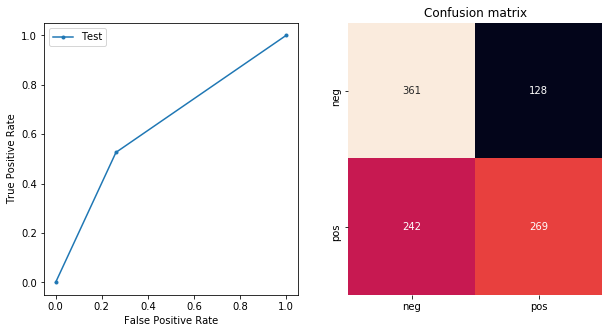

 
ROC AUC:	0.632
Accuracy:	0.630
		Micro	Macro	Weighted
Precision:	0.630	0.638	0.639
Recall:		0.630	0.632	0.630
F-measure:	0.630	0.627	0.626



In [112]:
eval_sklearn_visual(y_test, predicted_KN)

## **Логистическая регрессия**

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logreg_predicted = logreg.predict(x_test)

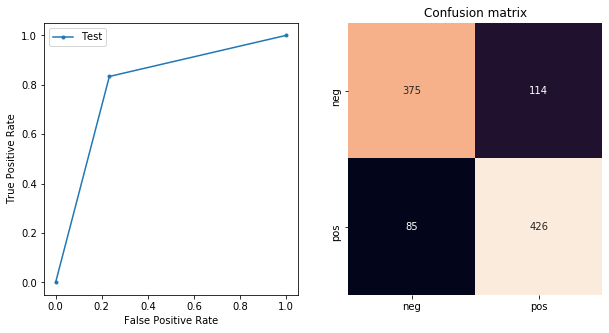

 
ROC AUC:	0.800
Accuracy:	0.801
		Micro	Macro	Weighted
Precision:	0.801	0.802	0.802
Recall:		0.801	0.800	0.801
F-measure:	0.801	0.800	0.801



In [111]:
eval_sklearn_visual(y_test, logreg_predicted)

##**Метод опорных векторов**



In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(x_train, y_train)
predicted_svc = clf.predict(x_test)

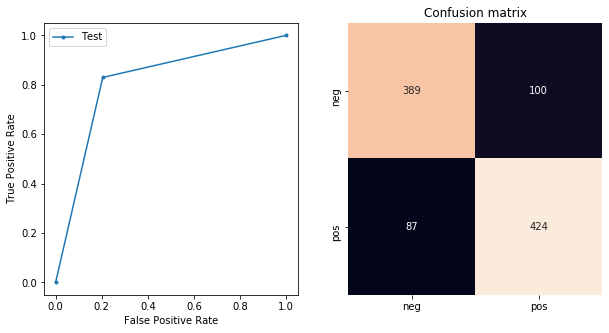

 
ROC AUC:	0.813
Accuracy:	0.813
		Micro	Macro	Weighted
Precision:	0.813	0.813	0.813
Recall:		0.813	0.813	0.813
F-measure:	0.813	0.813	0.813



In [110]:
eval_sklearn_visual(y_test, predicted_svc)

##**Метод наивного Байеса**

In [104]:
nb = BernoulliNB()
nb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
predicted_nb = nb.predict(x_test)

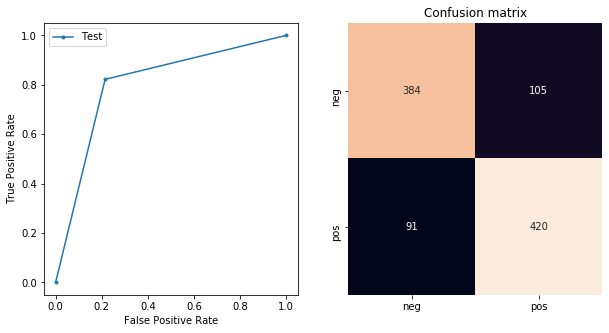

 
ROC AUC:	0.804
Accuracy:	0.804
		Micro	Macro	Weighted
Precision:	0.804	0.804	0.804
Recall:		0.804	0.804	0.804
F-measure:	0.804	0.804	0.804



In [109]:
eval_sklearn_visual(y_test, predicted_nb)

##**Деревья решений**

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf_T = DecisionTreeClassifier().fit(x_train, y_train)
predicted_T = clf_T.predict(x_test)


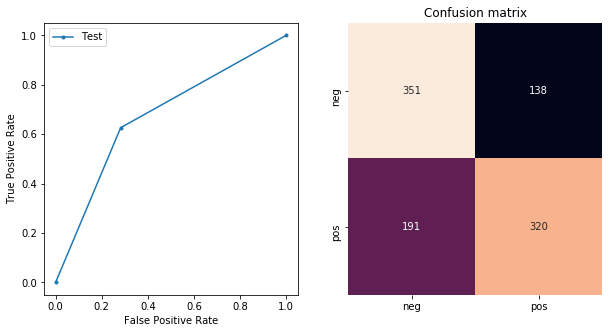

 
ROC AUC:	0.672
Accuracy:	0.671
		Micro	Macro	Weighted
Precision:	0.671	0.673	0.674
Recall:		0.671	0.672	0.671
F-measure:	0.671	0.671	0.670



In [108]:
eval_sklearn_visual(y_test, predicted_T)

Лучше всего себя по всем мерам оказался метод опорных векторов, а хуже всего - метод ближайшего соседа

##**15 негативных и положительных отзывов**

In [143]:
svc_probability = clf._predict_proba_lr(x_test)
print(svc_probability)


[[0.3778069  0.6221931 ]
 [0.60806039 0.39193961]
 [0.37115261 0.62884739]
 ...
 [0.51651052 0.48348948]
 [0.45633757 0.54366243]
 [0.33936773 0.66063227]]


In [144]:
probability_df = pd.DataFrame(svc_probability, columns = ['neg', 'pos'])
probability_df['text'] = test.text.values
probability_df.head()

,neg,pos,text
0,0.377807,0.622193,this movie is great i really enjoyed it.<br />...
1,0.608060,0.391940,this has to be the greatest practical joke eve...
2,0.371153,0.628847,and thus was born the most amorous skunk ever ...
3,0.484716,0.515284,this is a good blueprint for a study of corpor...
4,0.437554,0.562446,this is fantastic! everything from the score -...


In [145]:
negative = probability_df.sort_values('neg', ascending=False)
negative.head()

,neg,pos,text
56,0.838228,0.161772,talk about rubbish! i can't think of one good ...
114,0.820215,0.179785,what a sad surprise.<br /><br />being a die-ha...
775,0.814296,0.185704,i couldn't make heads or tails out of this ter...
313,0.813795,0.186205,"bad, bad, movie, so bad it is worth watching. ..."
129,0.812635,0.187365,did i waste my time. this is very pretentious ...


15 самых негативных отзыва

In [146]:
negative.text.values.tolist()[:15]

['talk about rubbish! i can\'t think of one good thing in this movie. the screenplay was poor, the acting was terrible and the effects, well there were no effects. i can\'t believe the writer of this movie did identity, everything in this movie made me sick to start to finish.<br /><br />the front cover of the video box shows a showman with shark like teeth and scary eyes. i looks like a scary villain, but like the old saying "never judge a book by it\'s cover", the whole villain looked like a cardboard cut out. one part in the film a girl gets killed by a salad tongs, terrible. the setting was bad enough, like they could of set the whole thing in lapland but no, a tropical island instead.<br /><br />i took this movie as a spoof, which i think they wanted it to be but the only thing that made me laugh in a bad way was the tacky effects. you can argue that i haven\'t watched the first one, but seeing this i would be safe if i wouldn\'t attempted it.<br /><br />the biggest joke in this m

In [147]:
positive = probability_df.sort_values('pos', ascending=False)
positive.head()

,neg,pos,text
212,0.220967,0.779033,"universal studios version of ""flipper"" (1996) ..."
360,0.221898,0.778102,"for a movie that was pg, this is one fun film...."
791,0.230978,0.769022,"i first encountered arthur penn's ""four friend..."
36,0.231161,0.768839,two great stars and a legendary director creat...
766,0.235455,0.764545,this is a really great film in the pulp fictio...


15 самых положительных отзыва

In [148]:
positive.text.values.tolist()[:15]

['universal studios version of "flipper" (1996) is a great heartwarming film for the entire family with good values and sentimentality. it is the story of sandy ricks, a teenager from chicago who reluctantly spends his vacation with his uncle porter ricks in the bahamas. this ultimately changes the teenagers life and he grows up in the process. he learns to appreciate nature and to have a respect for the environment. i grew up in the 1960\'s and the nbc television show "flipper" was my favorite childhood show. elijah wood is perfectly cast as a 1990\'s sandy ricks and gives an excellent performance. as much as i liked the nbc television show and mgm theatrical feature films with luke halpin as sandy in the 1960\'s i liked this feature the best! i feel elijah wood is the best sandy ricks. with respect to luke halpin i feel elijah wood has more of a range of acting talent and emotes more as an actor which makes his performance excellent and more believable. i think elijah wood is the bes

##**Метрики**

In [0]:
def evaluation(true, predicted):
    tp = 0 
    fp = 0
    tn = 0
    fn = 0
    for t, p in zip(true, predicted):
        if t == p and t == 0: 
            tn +=1
        elif t == p and t == 1: 
            tp +=1
        elif t != p and p == 0: 
            fn +=1
        elif t != p and p == 1: 
            fp +=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*precision*recall/(precision+recall)
    print('''
    Precision:\t{:.3f}
    Recall:\t{:.3f}
    F-measure:\t{:.3f}
    '''.format(precision, recall, f1))

In [157]:
evaluation(y_test, logreg_predicted)


    Precision:	0.789
    Recall:	0.834
    F-measure:	0.811
    


In [150]:
evaluation(y_test,predicted_KN)


    Precision:	0.678
    Recall:	0.526
    F-measure:	0.593
    


In [151]:
evaluation(y_test,predicted_svc)


    Precision:	0.809
    Recall:	0.830
    F-measure:	0.819
    


In [152]:
evaluation(y_test,predicted_nb)


    Precision:	0.800
    Recall:	0.822
    F-measure:	0.811
    


In [153]:
evaluation(y_test,predicted_T)


    Precision:	0.699
    Recall:	0.626
    F-measure:	0.660
    
